In [111]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from IPython.display import Image

In [112]:
dataset = [
    ['<21', 'High', 'Male', 'Single', 'No'],
    ['<21', 'High', 'Male', 'Married', 'No'],
    ['21-35', 'High', 'Male', 'Single', 'Yes'],
    ['>35', 'Medium', 'Male', 'Single', 'Yes'],
    ['>35', 'Low', 'Female', 'Single', 'Yes'],
    ['>35', 'Low', 'Female', 'Married', 'No'],
    ['21-35', 'Low', 'Female', 'Married', 'Yes'],
    ['<21', 'Medium', 'Male', 'Single', 'No'],
    ['<21', 'Low', 'Female', 'Married', 'Yes'],
    ['>35', 'Medium', 'Female', 'Single', 'Yes'],
    ['<21', 'Medium', 'Female', 'Married', 'Yes'],
    ['21-35', 'Medium', 'Male', 'Married', 'Yes'],
    ['21-35', 'High', 'Female', 'Single', 'Yes'],
    ['>35', 'Medium', 'Male', 'Married', 'No']
]
columns = ['Age', 'Income', 'Gender', 'Marital Status', 'Buys']

In [113]:
#data = pd.read_csv("data.csv")
data = pd.DataFrame(dataset, columns = columns)
data

,Age,Income,Gender,Marital Status,Buys
0,<21,High,Male,Single,No
1,<21,High,Male,Married,No
2,21-35,High,Male,Single,Yes
3,>35,Medium,Male,Single,Yes
4,>35,Low,Female,Single,Yes
5,>35,Low,Female,Married,No
6,21-35,Low,Female,Married,Yes
7,<21,Medium,Male,Single,No
8,<21,Low,Female,Married,Yes
9,>35,Medium,Female,Single,Yes


In [120]:
le=LabelEncoder();
x=data.iloc[:,0:4]
print(x)
x=x.apply(le.fit_transform)
print("Age:",list( zip(data.iloc[:,0], x.iloc[:,0])))
print("\nIncome:",list( zip(data.iloc[:,1], x.iloc[:,1])))
print("\nGender:",list( zip(data.iloc[:,2], x.iloc[:,2])))
print("\nmaritialStatus:",list( zip(data.iloc[:,3], x.iloc[:,3])))

      Age  Income  Gender Marital Status
0     <21    High    Male         Single
1     <21    High    Male        Married
2   21-35    High    Male         Single
3     >35  Medium    Male         Single
4     >35     Low  Female         Single
5     >35     Low  Female        Married
6   21-35     Low  Female        Married
7     <21  Medium    Male         Single
8     <21     Low  Female        Married
9     >35  Medium  Female         Single
10    <21  Medium  Female        Married
11  21-35  Medium    Male        Married
12  21-35    High  Female         Single
13    >35  Medium    Male        Married
Age: [('<21', 1), ('<21', 1), ('21-35', 0), ('>35', 2), ('>35', 2), ('>35', 2), ('21-35', 0), ('<21', 1), ('<21', 1), ('>35', 2), ('<21', 1), ('21-35', 0), ('21-35', 0), ('>35', 2)]

Income: [('High', 0), ('High', 0), ('High', 0), ('Medium', 2), ('Low', 1), ('Low', 1), ('Low', 1), ('Medium', 2), ('Low', 1), ('Medium', 2), ('Medium', 2), ('Medium', 2), ('High', 0), ('Medium', 2)]

Ge

In [121]:
x

,Age,Income,Gender,Marital Status
0,1,0,1,1
1,1,0,1,0
2,0,0,1,1
3,2,2,1,1
4,2,1,0,1
5,2,1,0,0
6,0,1,0,0
7,1,2,1,1
8,1,1,0,0
9,2,2,0,1


In [122]:
y=data.iloc[:,4:5]

In [123]:
y

,Buys
0,No
1,No
2,Yes
3,Yes
4,Yes
5,No
6,Yes
7,No
8,Yes
9,Yes


In [124]:
dt=DecisionTreeClassifier()
dt.fit(x,y)

DecisionTreeClassifier()

In [125]:
#[Age < 21, Income = Low,Gender = Female, Marital Status = Married]
query=np.array([1,1,0,0])
pred=dt.predict([query])
pred[0]

'Yes'

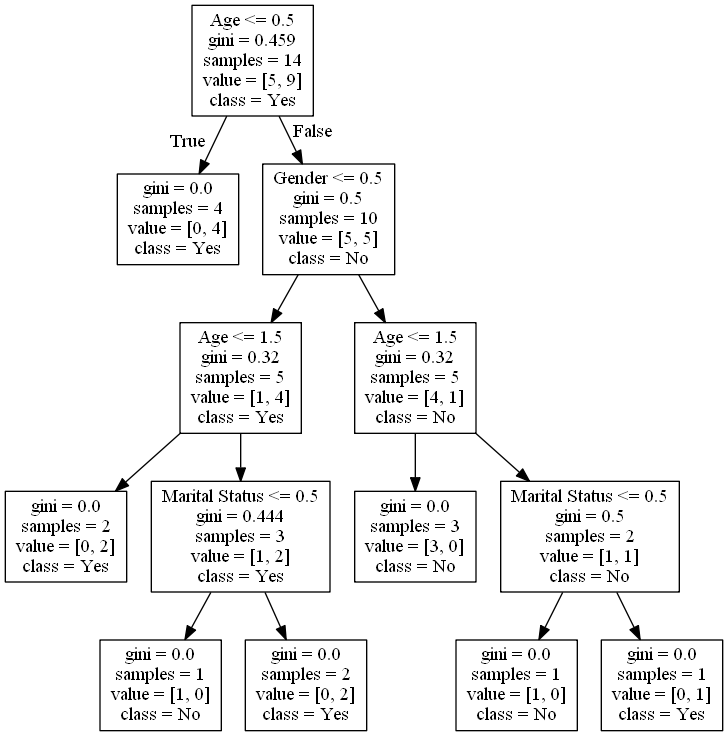

In [126]:
export_graphviz(dt,out_file="data.dot",feature_names=x.columns,class_names=["No","Yes"])
!dot -Tpng data.dot -o tree.png
Image("tree.png")